# Esercitazione 3 
Esercizio di windowing. Caricare in input il segnale test e poi LCD93S1 fare windowing con:
- segmentattizzazione segnale
- spettro del segnale finestrato
- finestramento del segnale con una funzione di smooth
- log-spectrum del segnale campionato

Per prima cosa, andiamo a caricare il campione audio

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy 
import scipy.io
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

/home/gabriele/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Sample rate:  16000
Data:  (69985,)
numero di campioni = 69985
length (durata)= 4.3740625 s


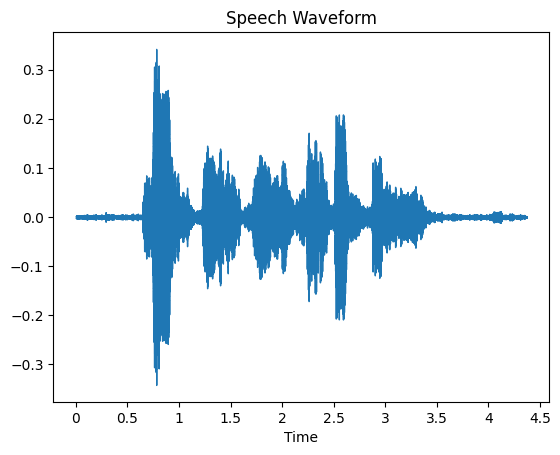

In [11]:
import librosa
import matplotlib.pyplot as plt

filename = "test.wav"
signal, sample_rate = librosa.load(filename, sr=16000)

print("Sample rate: ", sample_rate)
print("Data: ", signal.shape)
print(f"numero di campioni = {signal.shape[0]}")
# print(f"frequenza di campionamento: {samplerate}")
length = signal.shape[0] / sample_rate
print(f"length (durata)= {length} s")

# Plot the waveform
plt.figure()
librosa.display.waveshow(signal, sr=sample_rate)
plt.title("Speech Waveform")
plt.show()

In [33]:
def segment_signal(signal, fs, t_window_ms = 0.03):
    '''
    Frequenza in kHz, finestra in ms
    '''
    n_samples_window = int(fs * t_window_ms)
    print(f"Numero di campioni per finestra: {n_samples_window}")
    num_segmenti = int(signal.shape[0] // n_samples_window)
    print(f"Numero di segmenti: {num_segmenti}")
    # Lista per conservare i segmenti finestrati
    segmenti = []
    # Crea i segmenti
    for i in range(num_segmenti):
        inizio = i * n_samples_window
        fine = (i + 1) * n_samples_window
        segmento = signal[inizio:fine]
        segmenti.append(segmento)
    # Gestisci eventuali campioni rimanenti
    if len(signal) % n_samples_window != 0:
        segmento_parziale = signal[num_segmenti * n_samples_window:]
        segmenti.append(segmento_parziale)
    return segmenti

segmenti = segment_signal(signal, fs=sample_rate) 

Numero di campioni per finestra: 480
Numero di segmenti: 145


In [21]:
# # se volessi ricostruire il segnale finestrato
# # Identifica i segmenti tra il secondo 1 e il secondo 2
# start_time = 1  # secondo 1
# end_time = 2    # secondo 2
# t_window = 0.03

# # Calcola gli indici dei segmenti
# start_index = int(start_time * sample_rate // (sample_rate * t_window))
# end_index = int(end_time * sample_rate // (sample_rate * t_window))

# # Concatenare i segmenti tra il secondo 1 e il secondo 2
# segmento_ricomposto = np.concatenate(segmenti[start_index:end_index])

# # Crea il grafico del segnale ricomposto
# plt.figure(figsize=(10, 4))
# plt.plot(np.arange(len(segmento_ricomposto)) / sample_rate, segmento_ricomposto)
# plt.title("Segnale Ricomposto dal secondo 1 al secondo 2")
# plt.xlabel("Tempo (s)")
# plt.ylabel("Ampiezza")
# plt.grid(True)
# plt.show()

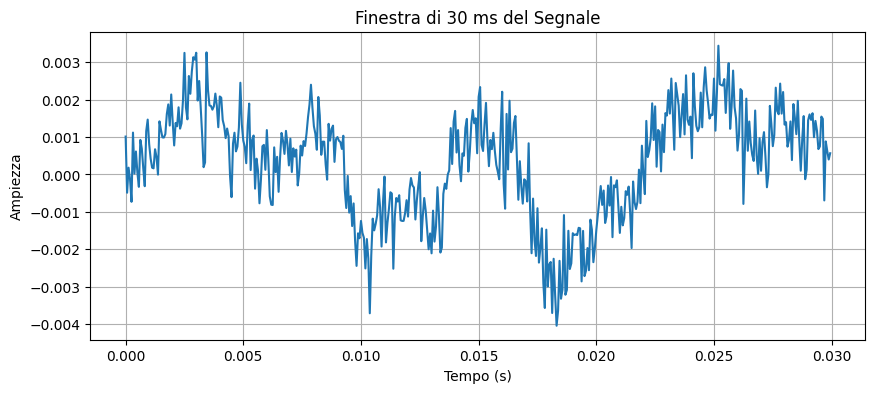

In [37]:
# Crea il grafico
t_window = 30
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(segmenti[0])) / sample_rate, segmenti[2])
plt.title(f"Finestra di {t_window} ms del Segnale")
plt.xlabel("Tempo (s)")
plt.ylabel("Ampiezza")
plt.grid(True)
plt.show()

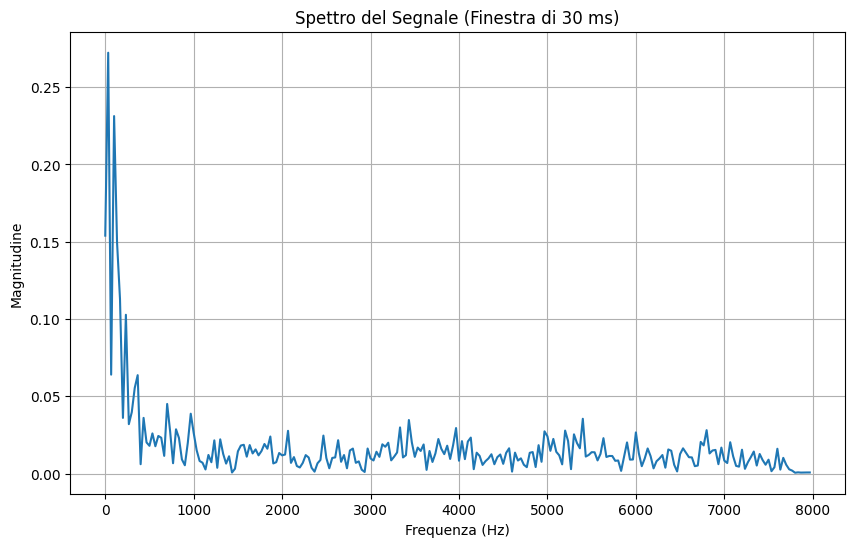

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione per calcolare lo spettro di una finestra
def calcola_spettro_finestra(segnale, fs):
    # Applicare la Trasformata di Fourier al segnale
    spetto = np.fft.fft(segnale)
    # Calcolare la frequenza associata a ciascun punto dello spettro
    n = len(segnale)
    frequenze = np.fft.fftfreq(n, 1/fs)
    # Prendi solo la parte positiva dello spettro (simmetrico)
    spetto = np.abs(spetto[:n//2])  # Magnitudine del segnale
    frequenze = frequenze[:n//2]  # Frequenze positive
    return frequenze, spetto

# Calcolare lo spettro della finestra
frequenze, spettro = calcola_spettro_finestra(segmenti[2], sample_rate)

# Plot dello spettro
plt.figure(figsize=(10, 6))
plt.plot(frequenze, spettro)
plt.title("Spettro del Segnale (Finestra di 30 ms)")
plt.xlabel("Frequenza (Hz)")
plt.ylabel("Magnitudine")
plt.grid(True)
plt.show()


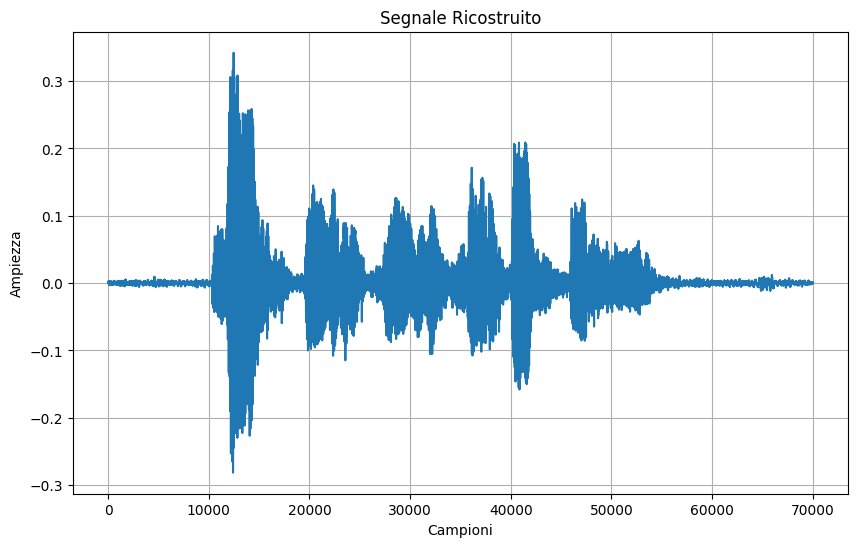

In [39]:
def ricostruzione_segnale(segmenti):
    segnale_ricostruito = np.concatenate(segmenti)
    # Plot del segnale ricostruito
    plt.figure(figsize=(10, 6))
    plt.plot(segnale_ricostruito)
    plt.title("Segnale Ricostruito")
    plt.xlabel("Campioni")
    plt.ylabel("Ampiezza")
    plt.grid(True)
    plt.show()
    
ricostruzione_segnale(segmenti)

Come possiamo notare, il segmento in se per se non ci da tanta informazione, questo perché intervengono molti fattori nella riproduzione del segnale del parlato, tra cui:
- aliasing
- interruzione vocale
- respiro

Quindi è utile applicare funzioni di windowing come:
- funzione rettangolare
- funzione di Hanning
- funzione di Hamming

In [41]:
def windowing_f(segmento, f_window):
    return segmento*f_window

In [56]:
# Funzione per calcolare lo spettro di una finestra
from numpy import log10


def calcola_spettro_finestra(segnale, fs):
    # Applicare la Trasformata di Fourier al segnale
    spetto = np.fft.fft(segnale)
    # Calcolare la frequenza associata a ciascun punto dello spettro
    n = len(segnale)
    frequenze = np.fft.fftfreq(n, 1/fs)
    # Prendi solo la parte positiva dello spettro (simmetrico)
    spetto = np.abs(spetto[:n//2])  # Magnitudine del segnale
    frequenze = frequenze[:n//2]  # Frequenze positive
    return frequenze, spetto

def spettro_f(segmento, sample_rate=sample_rate):
    # Crea il grafico
    t_window = 30
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(segmento)) / sample_rate, segmento)
    plt.title(f"Finestra di {t_window} ms del Segnale")
    plt.xlabel("Tempo (s)")
    plt.ylabel("Ampiezza")
    plt.grid(True)
    plt.show()
    # Calcolare lo spettro della finestra
    frequenze, spettro = calcola_spettro_finestra(segmento, sample_rate)
    # Plot dello spettro
    plt.figure(figsize=(10, 6))
    plt.plot(frequenze, 20*log10(spettro))
    plt.title("Spettro del Segnale (Finestra di 30 ms)")
    plt.xlabel("Frequenza (Hz)")
    plt.ylabel("Log Magnitude")
    plt.grid(True)
    plt.show()


In [57]:
from scipy import signal

rect = signal.windows.boxcar(len(segmenti[0])) # finestra della dimensione di un segmento
hamm = signal.windows.hamming(len(segmenti[0]))
hann = signal.windows.hann(len(segmenti[0]))

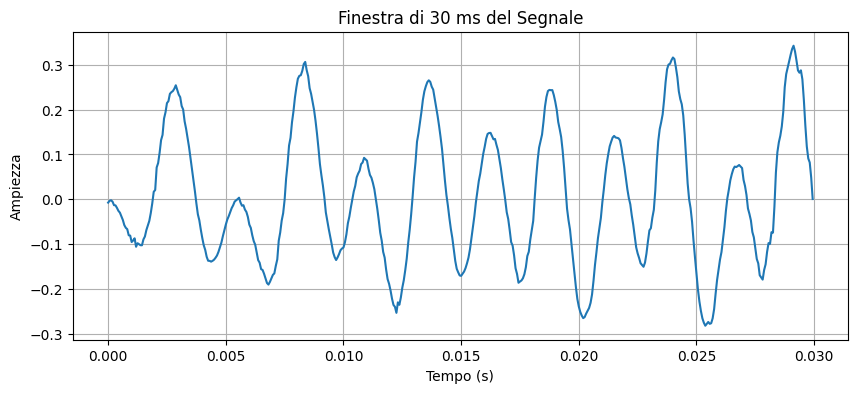

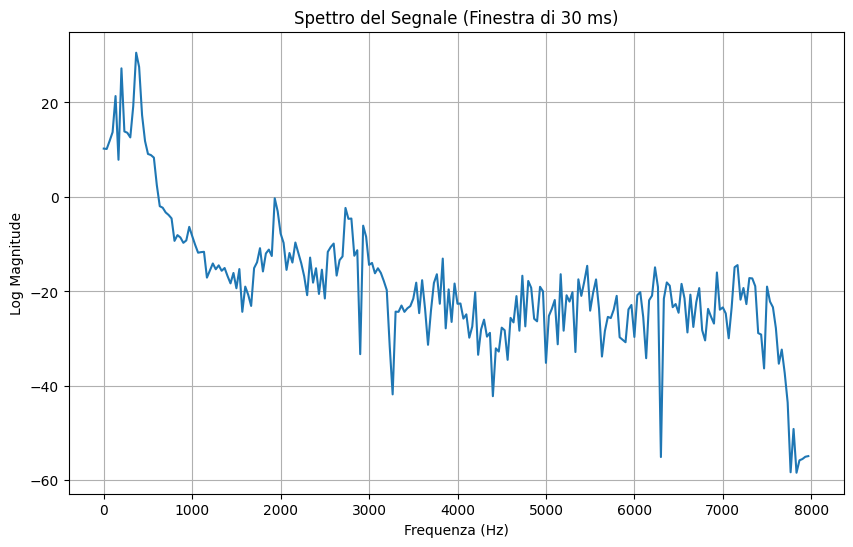

In [85]:
# provo prima la rect
signal_rect = windowing_f(segmenti[25], rect)
spettro_f(signal_rect)

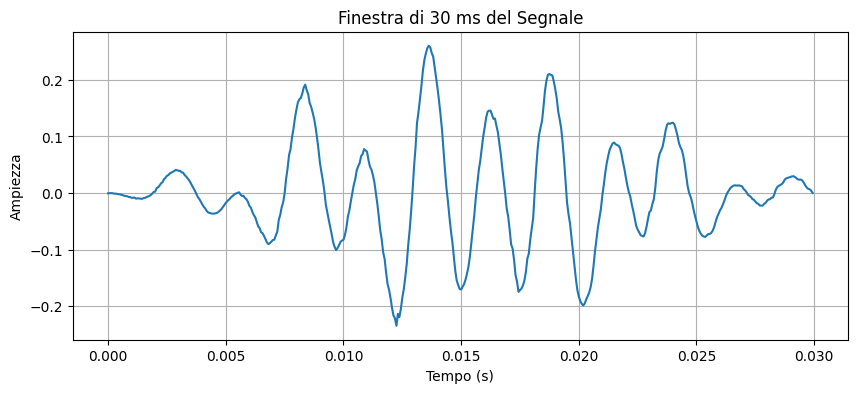

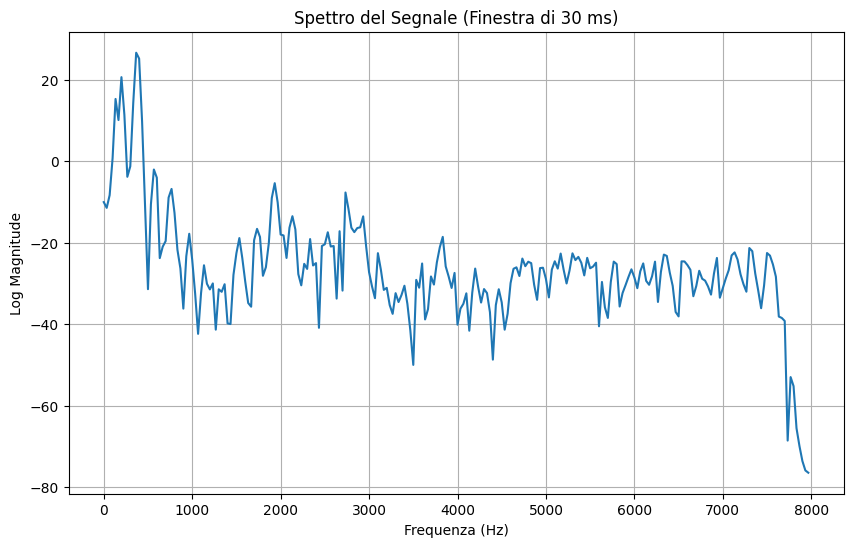

In [86]:
# provo prima la rect
signal_rect = windowing_f(segmenti[25], hamm)
spettro_f(signal_rect)

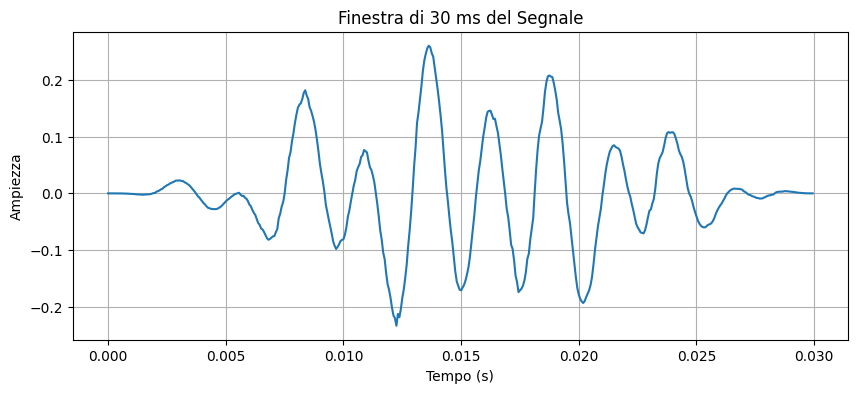

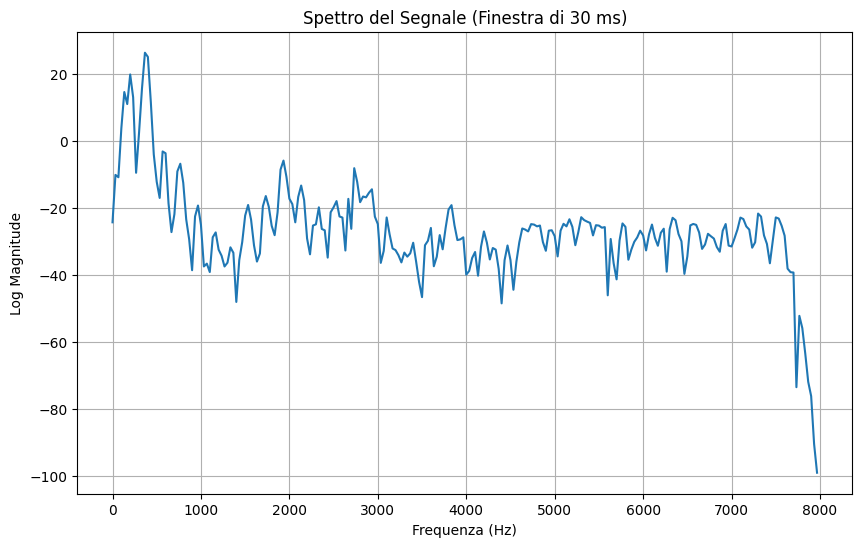

In [87]:
# provo prima la rect
signal_rect = windowing_f(segmenti[25], hann)
spettro_f(signal_rect)

# Esercizio 2
Narrow e Wideband

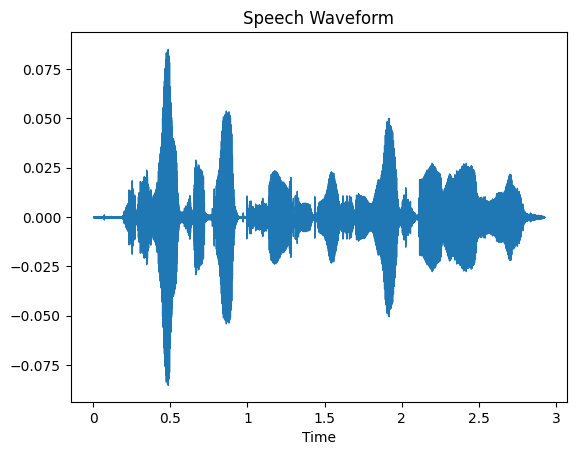

In [111]:
import librosa
import matplotlib.pyplot as plt

filename = "LDC93S1.wav"
data, sample_rate = librosa.load(filename, sr=16000)

# Plot the waveform
plt.figure()
librosa.display.waveshow(data, sr=sample_rate)
plt.title("Speech Waveform")
plt.show()

In [112]:
sample_rate

16000

Per andare a mostrare wideband o narrow band dobbiamo selezionare il numero di campioni da tenere in considerazione per la dimensione della finestra (su cui andare a calcolare la sftf).
- partiamo dalla fs
- il pitch è a 100 Hz
- fisso una dimensione della finestra a 30ms per esempio 
- definisco anche una window_step
Dal momento che abbiamo queste informazioni, conoscendo la dimensione della finestra e la frequenza di campionamento posso determinare quanti campioni ci saranno per ogni finestra

In [113]:
t_window = 0.03
fs = sample_rate
N_window = t_window * sample_rate
print(N_window)

480.0


In [116]:
import numpy as np
from scipy import signal

def stft(data, window_size, hop_length, w_function = 'hann'):
    if w_function == 'hamm':
        windowing = signal.windows.hamming(window_size)
    if w_function == 'rect':
        windowing = signal.windows.boxcar(window_size)
    if w_function== 'hann':
        windowing = signal.windows.hann(window_size)
    n_frames = 1 + (len(data) - window_size) // hop_length
    stft_matrix = np.empty((window_size // 2 + 1, n_frames), dtype=complex)

    for i in range(n_frames):
        frame = data[i * hop_length: i * hop_length + window_size]
        windowed_frame = frame * windowing # applico la hamming window
        stft_matrix[:, i] = np.fft.rfft(windowed_frame)

    return stft_matrix

# window_size = 1024
# hop_length = 512
window_size = int(N_window)
hop_length = int(window_size // 2) + 1
stft_matrix = stft(data, window_size, hop_length)

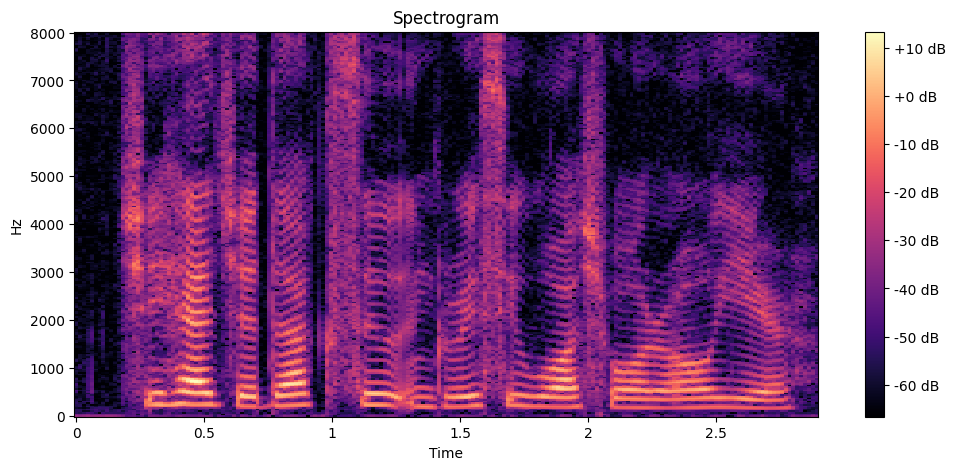

In [117]:
def plot_spectrogram(stft_matrix, sample_rate, hop_length):
    magnitude_spectrogram = np.abs(stft_matrix)
    log_spectrogram = librosa.amplitude_to_db(magnitude_spectrogram)
    plt.figure(figsize=(12, 5))
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length, x_axis="time", y_axis="linear")
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram")
    plt.show()

plot_spectrogram(stft_matrix, sample_rate, hop_length)

Invece, usano finestre più corte abbiamo un Narrow band

In [124]:
t_window = 0.010
fs = sample_rate
N_window = t_window * sample_rate
print(N_window)

160.0


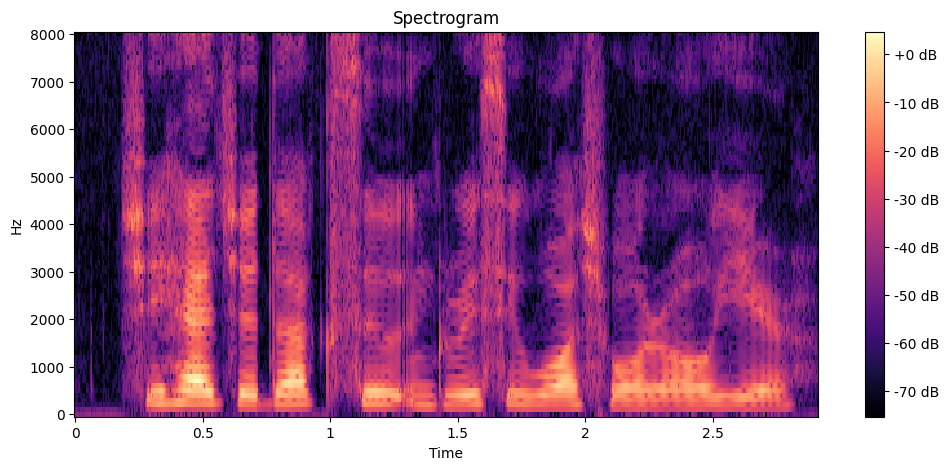

In [125]:
window_size = int(N_window)
hop_length = int(window_size // 2) + 1 # hop del 50%
stft_matrix = stft(data, window_size, hop_length, w_function='hann')
plot_spectrogram(stft_matrix, sample_rate, hop_length)

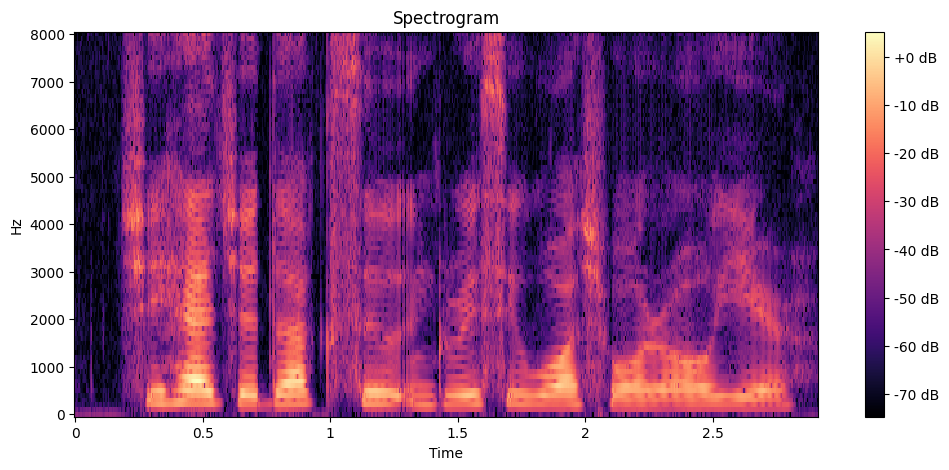

In [126]:
window_size = int(N_window)
hop_length = int(window_size // 2) + 1 # hop del 50%
stft_matrix = stft(data, window_size, hop_length, w_function='hamm')
plot_spectrogram(stft_matrix, sample_rate, hop_length)

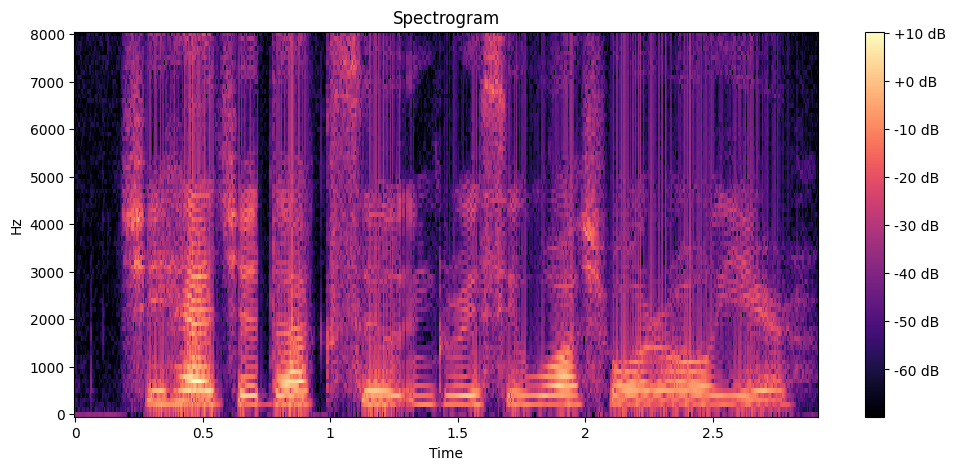

In [127]:
window_size = int(N_window)
hop_length = int(window_size // 2) + 1 # hop del 50%
stft_matrix = stft(data, window_size, hop_length, w_function='rect')
plot_spectrogram(stft_matrix, sample_rate, hop_length)